In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



df = pd.read_csv(r'C:\Users\enric\OneDrive\Radna površina\Progetto ML\data.txt', delimiter='\t', header = 0)
print(df.head())


#togliamo la colonna contente serie-a
df.drop(columns = ['League'], inplace = True)
print(df.columns)
#estrazione delle squadre
list_teams = sorted(set(df.iloc[:,1]))

#facciamo un subset contenente le squadre, gli avvenimenti delle partite e il girone

partite = df.iloc[:, [0,1,3,6,7]]
partite = partite.sort_values(by = 'Round')
print(partite.head())


#Correlation Matrix

# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.show()

    League        Home      Away  \
0  serie-a    AC Milan  Sassuolo   
1  serie-a      Chievo     Inter   
2  serie-a  Fiorentina    Torino   
3  serie-a       Lazio   Bologna   
4  serie-a      Napoli    Verona   

                                                 INC  Round        Date  \
0  ["02' Goal_Home - Muntari S.(Pazzini G.)", "27...     38  18.05.2014   
1  ["38' Yellow_Away - Andreolli M.", "41' Goal_A...     38  18.05.2014   
2  ["27' Yellow_Home - Pizarro D.", "56' Yellow_A...     38  18.05.2014   
3  ["42' Yellow_Away - Pazienza M.", "61' Yellow_...     38  18.05.2014   
4  ["05' Goal_Home - Callejon J.(Mertens D.)", "1...     38  18.05.2014   

    Time  H_Score  A_Score  HT_H_Score  ...  A_Offsides H_Throw_in  \
0  20:45        2        1           2  ...         3.0       23.0   
1  20:45        2        1           0  ...         2.0       18.0   
2  20:45        2        2           0  ...         6.0       14.0   
3  20:45        1        0           0  ...         

In [2]:
#calcolo classifica
standings = {team: [0,0,0] for team in list_teams}


for i in range (len(df.iloc[:,0])):

    if partite.iloc[i,3] > partite.iloc[i,4]:
        #assegnazione punti vittoria casa
        standings[partite.iloc[i,0]][0] += 3

    elif partite.iloc[i,3] < partite.iloc[i,4]:
        standings[partite.iloc[i,1]][0] += 3
    
    else: 
        standings[partite.iloc[i,0]][0] += 1
        standings[partite.iloc[i,1]][0] += 1

    #reti segnate e subite
    standings[partite.iloc[i,0]][1] += partite.iloc[i,3]
    standings[partite.iloc[i,0]][2] += partite.iloc[i,4]
    standings[partite.iloc[i,1]][1] += partite.iloc[i,4]
    standings[partite.iloc[i,1]][2] += partite.iloc[i,3] 
    

standings = dict(sorted(standings.items(), key=lambda item: item[1], reverse=True))

{'Inter': [24, 54, 78, 83, 57, 19, 16, 8, 2, 1, 0], 'Juventus': [9, 59, 94, 85, 59, 24, 7, 4, 1, 0, 0], 'AC Milan': [23, 58, 86, 80, 49, 29, 12, 4, 0, 1, 0], 'Udinese': [21, 71, 81, 76, 49, 23, 14, 2, 5, 0, 0], 'Sassuolo': [24, 51, 69, 77, 64, 26, 14, 12, 5, 0, 0], 'Napoli': [17, 47, 77, 80, 53, 29, 30, 6, 3, 0, 0], 'AS Roma': [21, 50, 82, 68, 64, 34, 16, 6, 1, 0, 0], 'Lazio': [16, 38, 80, 92, 54, 28, 18, 10, 5, 0, 1], 'Fiorentina': [31, 56, 74, 84, 44, 23, 16, 11, 2, 1, 0], 'Atalanta': [25, 46, 83, 80, 46, 35, 13, 7, 6, 1, 0], 'Sampdoria': [18, 51, 89, 83, 47, 32, 16, 4, 1, 0, 1], 'Genoa': [33, 66, 82, 68, 48, 25, 14, 5, 1, 0, 0]}
[ 0  1  2  3  4  5  6  7  8  9 10]
342


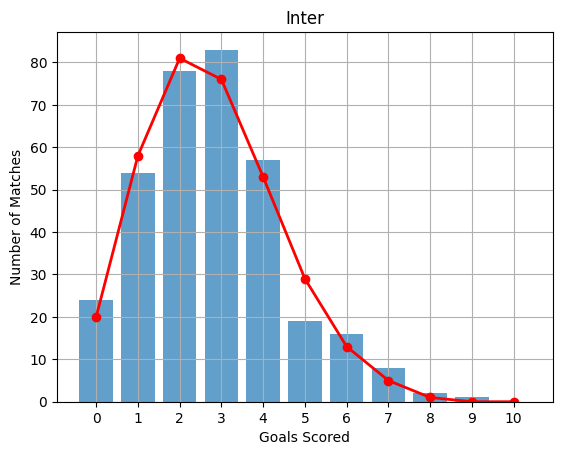

342


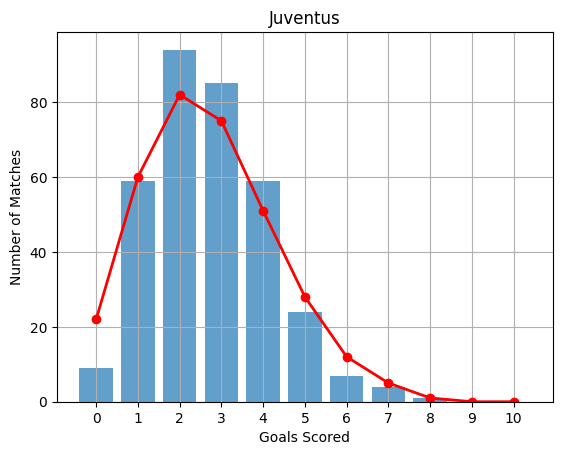

342


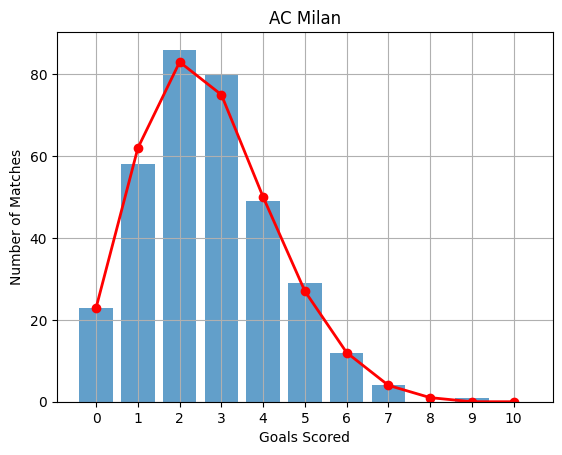

342


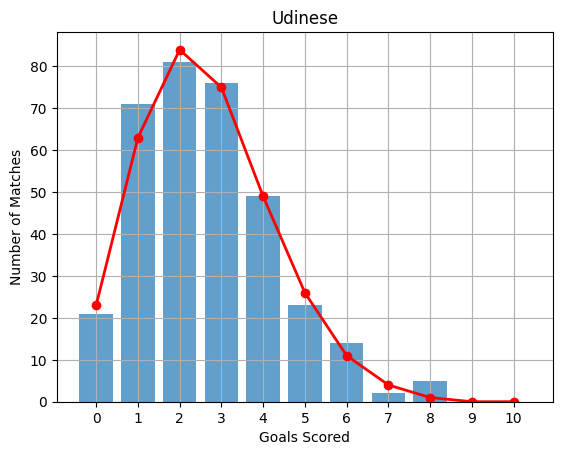

342


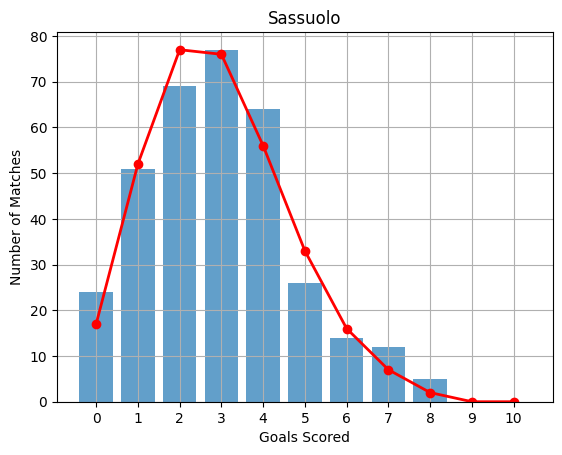

342


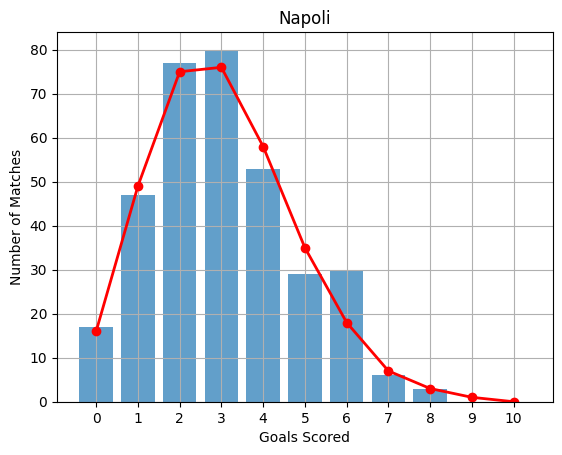

342


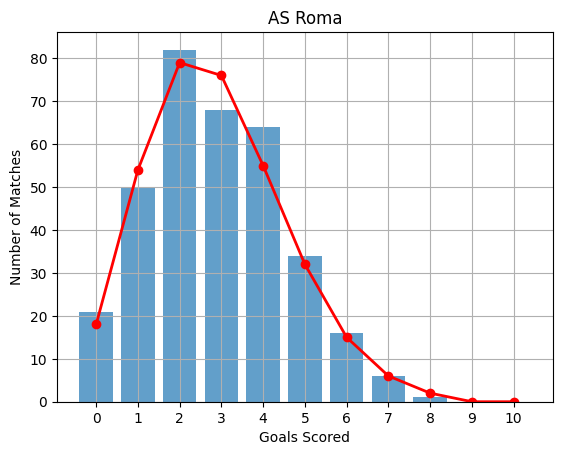

342


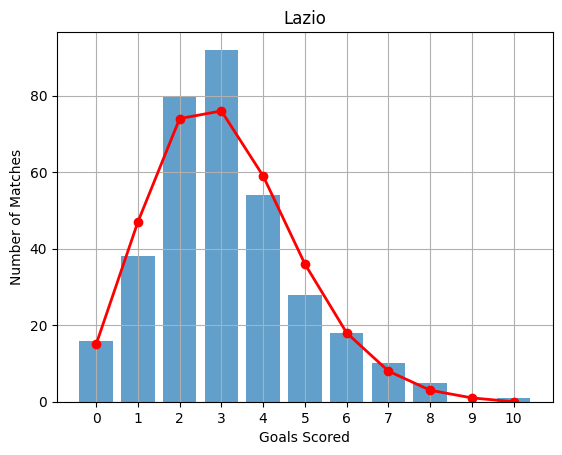

342


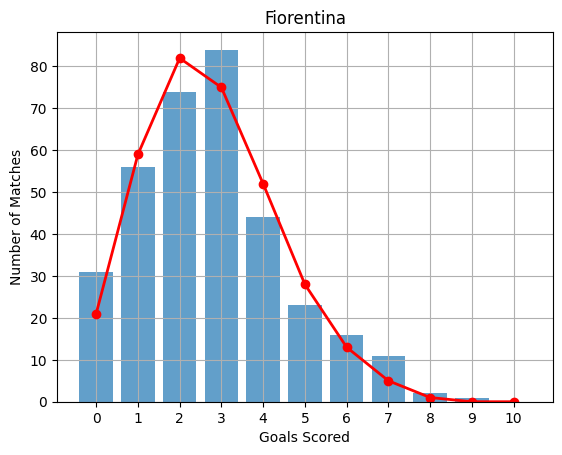

342


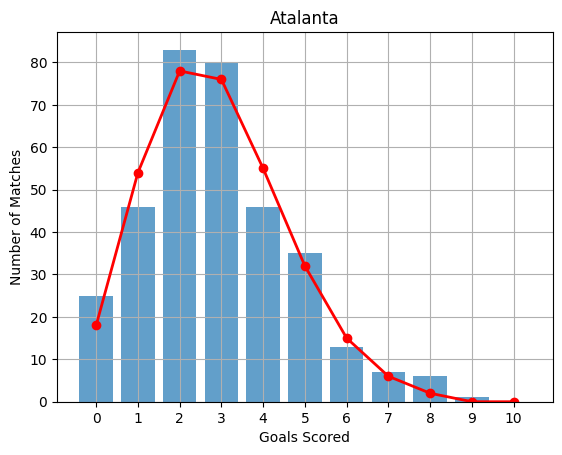

342


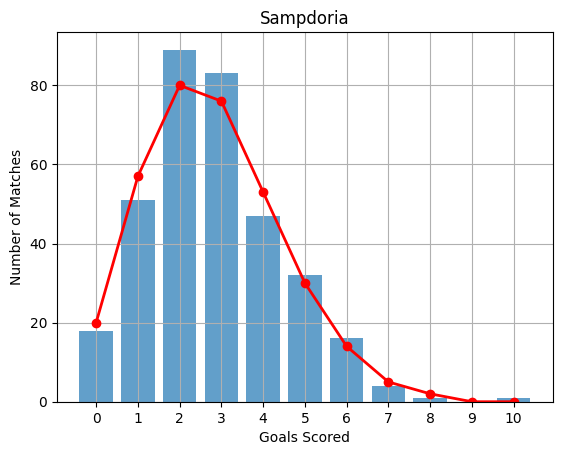

342


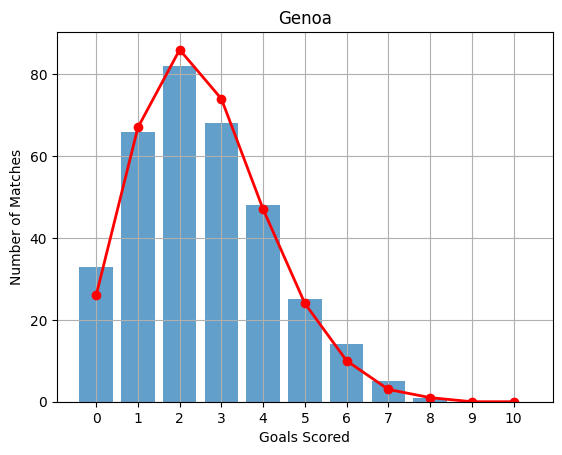

In [3]:
#calcolo numero di gol nelle partite delle squadre che parteciparono in serie A in tutte le stagioni dal 13/14 al 21/22

squadre_2013_2022 = ['Inter', 'Juventus', 'AC Milan', 'Udinese', 'Sassuolo', 'Napoli', 'AS Roma', 'Lazio', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Genoa' ]

matches_with_xgoals = {team: [0]*11 for team in squadre_2013_2022}

for i in range (len(df.iloc[:,0])):

    if partite.iloc[i,0] in squadre_2013_2022:
        matches_with_xgoals[partite.iloc[i,0]][partite.iloc[i,3] + partite.iloc[i,4]] += 1
    
    if partite.iloc[i,1] in squadre_2013_2022:
        matches_with_xgoals[partite.iloc[i,1]][partite.iloc[i,3] + partite.iloc[i,4]] += 1

print(matches_with_xgoals)

# Creazione valori asse x - reti segnate
goals = np.arange(11)
print(goals)


poisson_pmf = np.arange(11)


# Plot dell'istogramma
for team in squadre_2013_2022:

    sum_goals = 0
    for j in range (len(matches_with_xgoals[team])):
        sum_goals += matches_with_xgoals[team][j]*j
    # calcolo del numero medio di gol segnati per usare come il valore del parametro lambda della distribuzione di poisson
    lambda_ = sum_goals/sum(matches_with_xgoals[team])
    for i in range(len(poisson_pmf)):
        poisson_pmf[i] = 342*np.exp(-lambda_) * np.power(lambda_, goals[i]) / np.math.factorial(goals[i])

    print(sum( matches_with_xgoals[team]))
    plt.bar(goals, matches_with_xgoals[team], align='center', alpha=0.7)
    plt.plot(goals, poisson_pmf, 'ro-', linewidth=2 )
    plt.xlabel('Goals Scored')
    plt.ylabel('Number of Matches')
    plt.title(team)
    plt.xticks(goals)  
    plt.grid(True)

    plt.show()


In [4]:
#cambio della colonna WIN in 1(Home), 0(Draw), 2(Away)

outcome_map = {'Home' : 1, 'Draw' : 0, 'Away' : 2}
df['WIN'] = df['WIN'].map(outcome_map)


#percento di possesso in numero
df['H_Ball_Possession'] = df['H_Ball_Possession'].str.rstrip('%')
df['A_Ball_Possession'] = df['A_Ball_Possession'].str.rstrip('%')

#predizione esito partite
features = [ 'H_BET', 'X_BET', 'A_BET', 'H_Ball_Possession', 'A_Ball_Possession', 'H_Goal_Attempts', 'A_Goal_Attempts', 'H_Shots_on_Goal', 'A_Shots_on_Goal',
             'H_Corner_Kicks','A_Corner_Kicks', 'H_Goalkeeper_Saves','A_Goalkeeper_Saves', 'H_Fouls', 'A_Fouls']
X = df[features]
Y = df['WIN']

#handling valori mancanti
missing_indices = X[X.isna().any(axis=1)].index
X = X.drop(missing_indices)
Y = Y.drop(missing_indices)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model_Random_Forest = RandomForestClassifier(n_estimators=100, random_state=65)
model_Random_Forest.fit(X_train, y_train)

y_pred = model_Random_Forest.predict(X_test)

# valutazione modello

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6491228070175439
Confusion Matrix:
 [[ 34  78  47]
 [ 25 253  18]
 [ 36  36 157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.21      0.27       159
           1       0.69      0.85      0.76       296
           2       0.71      0.69      0.70       229

    accuracy                           0.65       684
   macro avg       0.58      0.58      0.58       684
weighted avg       0.62      0.65      0.63       684



In [6]:
#Support Vector Machines

# Standardizzazione dei dati 
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma='scale'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


param_grid = {
    'C': [1, 10, 15, 17.5, 25, 30, 50, 100, 1000]
}

# creazione del modello SVM 
svm = SVC(kernel='rbf', gamma='scale')

# grid search con cross-validationcon
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Migliori parametri 
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# valutiamo il modello migliore
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy with best model: {:.2f}".format(test_accuracy))


##il risultato dell'accuracy migliore e sui 60%, trovato col hyperparameter tuning


Accuracy: 86.84%
Best parameters found:  {'C': 50}
Best cross-validation score: 0.99
Test set accuracy with best model: 1.00


Accuracy Logistic Regression OvR approach: 96.78%
Accuracy Logistic Regression Multinomial approach: 99.56%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       1.00      1.00      1.00       296
           2       1.00      0.99      0.99       229

    accuracy                           1.00       684
   macro avg       0.99      0.99      0.99       684
weighted avg       1.00      1.00      1.00       684



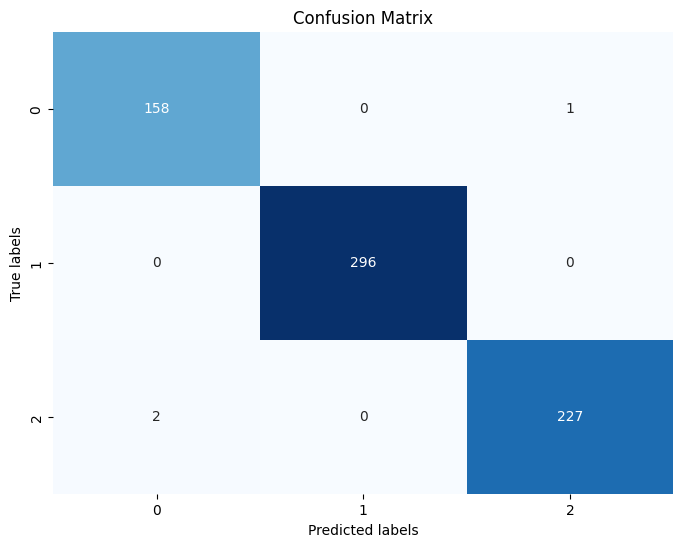

In [7]:
##Ora proviamo logistic regression #  base model
#per un problema con 3 classi proviamo due vari tipo di approci

#No.1 :  One vs Rest

model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='ovr', max_iter=250))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression OvR approach: {accuracy * 100:.2f}%')


#No. 1 : Multinomial

model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=250))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression Multinomial approach: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [10]:
#Predizione con parametri che si conoscono prima dell'inizio della partita


new_features = [ 'H_BET', 'X_BET', 'A_BET']
X_new = df[new_features]
Y_new = df['WIN']

#handling valori mancanti
missing_indices = X_new[X_new.isna().any(axis=1)].index
X_new = X_new.drop(missing_indices)
Y_new = Y_new.drop(missing_indices)




Accuracy Logistic Regression Multinomial approach: 54.68%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.54      0.85      0.66       281
           2       0.56      0.61      0.58       222

    accuracy                           0.55       684
   macro avg       0.37      0.49      0.41       684
weighted avg       0.40      0.55      0.46       684



c:\Users\enric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

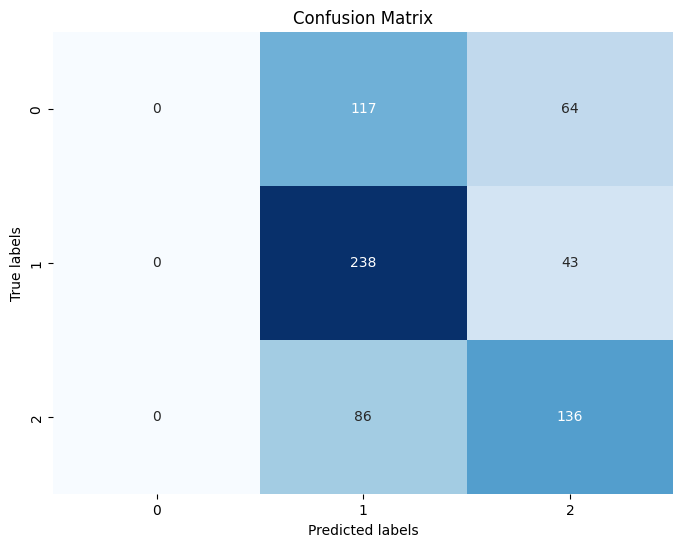

In [11]:
#No. 1 : Multinomial

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2)

model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=250))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression Multinomial approach: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/50
86/86 [==============================] - 1s 5ms/step - loss: 9.9079 - accuracy: 0.3609 - val_loss: 1.4240 - val_accuracy: 0.4474
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 3.1370 - accuracy: 0.3569 - val_loss: 1.0469 - val_accuracy: 0.4766
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 1.6726 - accuracy: 0.3752 - val_loss: 1.0324 - val_accuracy: 0.4971
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 1.3079 - accuracy: 0.3946 - val_loss: 1.0375 - val_accuracy: 0.4942
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1922 - accuracy: 0.4173 - val_loss: 1.0468 - val_accuracy: 0.4971
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1399 - accuracy: 0.4396 - val_loss: 1.0382 - val_accuracy: 0.4985
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 1.1035 - accuracy: 0.4411 - val_loss: 1.0226 - val_accuracy: 0.5000
Epoch 8/50
86/86 [==

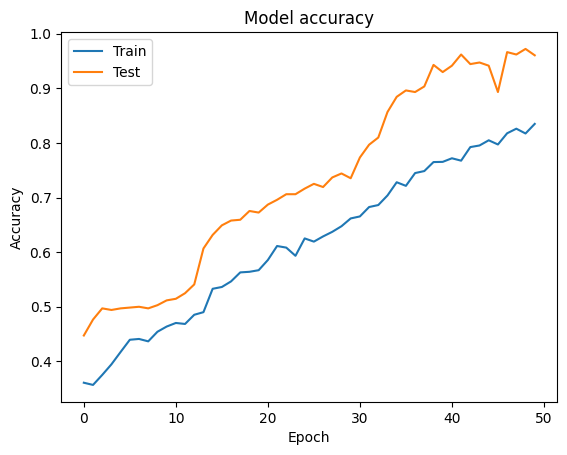

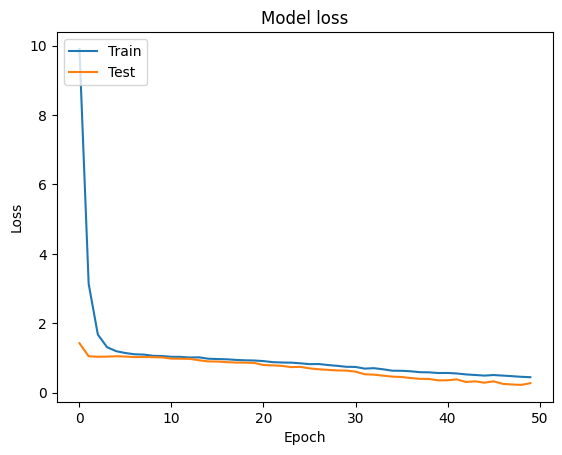

In [12]:
#Neural Networks
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X['A_Ball_Possession']= pd.to_numeric(X['A_Ball_Possession'])
X['H_Ball_Possession']= pd.to_numeric(X['H_Ball_Possession'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# costruzione del NN
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units for 3 classes

# Compilamento del modello
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train 
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate 
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

# predizioni
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# esempio di predizioni
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {y_test.iloc[i]}')

# Plotting the training and validation accuracy and loss
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [95]:
#Proviamo a predirre i gol che segnerà ogni squadra, ottenere un risultato finale e provare a simulare la stegione seguente e vedere quanto sbagliamo


features_home = [ 'Home',  'H_BET', 'X_BET', 'A_BET', 'H_Ball_Possession', 'H_Goal_Attempts', 'H_Shots_on_Goal', 'H_Shots_off_Goal', 'H_Corner_Kicks', 
                  'H_Offsides', 'H_Fouls', 'H_Goalkeeper_Saves', 'H_Fouls','A_Ball_Possession', 'A_Goal_Attempts', 'A_Shots_on_Goal', 'A_Shots_off_Goal', 'A_Corner_Kicks',
                   'A_Offsides', 'A_Fouls', 'A_Goalkeeper_Saves', 'A_Fouls', 'Date', 'H_Score']


features_away = [ 'Away','H_BET', 'X_BET', 'A_BET', 'A_Ball_Possession', 'A_Goal_Attempts', 'A_Shots_on_Goal', 'A_Shots_off_Goal', 'A_Corner_Kicks',
                   'A_Offsides', 'A_Fouls', 'A_Goalkeeper_Saves', 'A_Fouls','H_Ball_Possession', 'H_Goal_Attempts', 'H_Shots_on_Goal', 'H_Shots_off_Goal', 'H_Corner_Kicks', 
                 'H_Offsides', 'H_Fouls', 'H_Goalkeeper_Saves', 'H_Fouls', 'Date', 'A_Score']

##divisione train-test CASA
X_home = df[features_home]
X_home['H_Ball_Possession']= pd.to_numeric(X_home['H_Ball_Possession'])
missing_indices = X_home[X_home.isna().any(axis=1)].index
X_home = X_home.drop(missing_indices)

X_home['Date'] = pd.to_datetime(X_home['Date'])

X_H_train = X_home[X_home['Date'] <= '20.07.2021']
Y_H_train = X_H_train['H_Score']  

X_H_test = X_home[X_home['Date'] > '20.07.2021']
Y_H_test = X_H_test['H_Score']  

##divisione train-test TRASFERTA
X_away = df[features_away]
X_away['A_Ball_Possession']= pd.to_numeric(X_away['A_Ball_Possession'])
missing_indices = X_away[X_away.isna().any(axis=1)].index
X_away = X_away.drop(missing_indices)

X_away['Date'] = pd.to_datetime(X_away['Date'])

X_A_train = X_away[X_away['Date'] <= '20.08.2021']
Y_A_train = X_A_train['A_Score']  

X_A_test = X_away[X_away['Date'] > '20.08.2021']
Y_A_test = X_A_test['A_Score']  



#Creiamo un DF che contiene le squadre che disputano la partita, il risultato vero
risultati = pd.concat([X_H_test['Home'], X_A_test['Away'],  X_H_test['H_Score'],  X_A_test['A_Score']], axis=1)
list_teams = sorted(set(X_H_test.iloc[:,0]))



# togliamo le colonne in modo da lasciare solamente le features
X_H_test.drop(['Home', 'Date', 'H_Score'], inplace=True, axis = 1)
X_H_train.drop(['Home', 'Date', 'H_Score'], inplace=True, axis = 1)
X_A_train.drop(['Away', 'Date', 'A_Score'], inplace=True, axis = 1)
X_A_test.drop(['Away', 'Date', 'A_Score'], inplace=True, axis = 1)


# #Poisson regression
from sklearn.linear_model import PoissonRegressor

model_Pois_Regression = PoissonRegressor()
model_Pois_Regression.fit(X_H_train, Y_H_train) 

y_pred_H = model_Pois_Regression.predict(X_H_test)
y_pred_rounded_H = np.round(y_pred_H).astype(int)
risultati['H_Score_predicted'] = y_pred_rounded_H

model_Pois_Regression = PoissonRegressor()
model_Pois_Regression.fit(X_A_train, Y_A_train) 

y_pred_A = model_Pois_Regression.predict(X_A_test)
y_pred_rounded_A = np.round(y_pred_A).astype(int)
risultati['A_Score_predicted'] = y_pred_rounded_A

display(risultati)

print(list_teams)
#calcolo 
standings_pred = {team: [0,0,0] for team in list_teams}
standings_real = {team: [0,0,0] for team in list_teams}

for i in range (len(risultati.iloc[:,0])):
  if risultati.iloc[i,2] > risultati.iloc[i,3]:
    standings_real[risultati.iloc[i,0]][0] += 3

  if risultati.iloc[i,2] < risultati.iloc[i,3]:
    standings_real[risultati.iloc[i,1]][0] += 3
    
  if risultati.iloc[i,2] == risultati.iloc[i,3]: 
    standings_real[risultati.iloc[i,0]][0] += 1
    standings_real[risultati.iloc[i,1]][0] += 1
  
  if risultati.iloc[i,4] > risultati.iloc[i,5]:
    standings_pred[risultati.iloc[i,0]][0] += 3

  if risultati.iloc[i,4] < risultati.iloc[i,5]:
    standings_pred[risultati.iloc[i,1]][0] += 3
  
  if risultati.iloc[i,4] == risultati.iloc[i,5]:
    standings_pred[risultati.iloc[i,0]][0] += 1
    standings_pred[risultati.iloc[i,1]][0] += 1

    #reti segnate e subite
  standings_real[risultati.iloc[i,0]][1] += risultati.iloc[i,2]
  standings_real[risultati.iloc[i,0]][2] += risultati.iloc[i,3]
  standings_real[risultati.iloc[i,1]][1] += risultati.iloc[i,3]
  standings_real[risultati.iloc[i,1]][2] += risultati.iloc[i,2] 
  standings_pred[risultati.iloc[i,0]][1] += risultati.iloc[i,4]
  standings_pred[risultati.iloc[i,0]][2] += risultati.iloc[i,5]
  standings_pred[risultati.iloc[i,1]][1] += risultati.iloc[i,5]
  standings_pred[risultati.iloc[i,1]][2] += risultati.iloc[i,4] 
    

standings_real = dict(sorted(standings_real.items(), key=lambda item: item[1], reverse=True))
print(standings_real)

standings_pred = dict(sorted(standings_pred.items(), key=lambda item: item[1], reverse=True))
print(standings_pred)

for key in standings_real:
  print(key,standings_real[key], '\n')

C:\Users\enric\AppData\Local\Temp\ipykernel_15852\652696088.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_home['H_Ball_Possession']= pd.to_numeric(X_home['H_Ball_Possession'])
C:\Users\enric\AppData\Local\Temp\ipykernel_15852\652696088.py:19: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X_home['Date'] = pd.to_datetime(X_home['Date'])
C:\Users\enric\AppData\Local\Temp\ipykernel_15852\652696088.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Home,Away,H_Score,A_Score,H_Score_predicted,A_Score_predicted
3040,Salernitana,Udinese,0,4,1,4
3041,Venezia,Cagliari,0,0,1,1
3042,Inter,Sampdoria,3,0,4,1
3043,Sassuolo,AC Milan,0,3,1,4
3044,Spezia,Napoli,0,3,1,2
...,...,...,...,...,...,...
3415,Udinese,Juventus,2,2,1,1
3416,Empoli,Lazio,1,3,1,2
3417,Torino,Atalanta,1,2,1,2
3418,Inter,Genoa,4,0,3,1


['AC Milan', 'AS Roma', 'Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Napoli', 'Salernitana', 'Sampdoria', 'Sassuolo', 'Spezia', 'Torino', 'Udinese', 'Venezia', 'Verona']
{'AC Milan': [86, 69, 31], 'Inter': [84, 84, 32], 'Napoli': [79, 74, 31], 'Juventus': [70, 57, 37], 'Lazio': [64, 77, 58], 'AS Roma': [63, 59, 43], 'Fiorentina': [62, 59, 51], 'Atalanta': [59, 65, 48], 'Verona': [53, 65, 59], 'Sassuolo': [50, 64, 66], 'Torino': [50, 46, 41], 'Udinese': [47, 61, 58], 'Bologna': [46, 44, 55], 'Empoli': [41, 50, 70], 'Sampdoria': [36, 46, 63], 'Spezia': [36, 41, 71], 'Salernitana': [31, 33, 78], 'Cagliari': [30, 34, 68], 'Genoa': [28, 27, 60], 'Venezia': [27, 34, 69]}
{'Inter': [87, 86, 38], 'Napoli': [71, 69, 43], 'Juventus': [69, 57, 39], 'AC Milan': [66, 63, 43], 'AS Roma': [63, 62, 49], 'Lazio': [62, 69, 57], 'Atalanta': [62, 67, 47], 'Verona': [56, 59, 51], 'Torino': [54, 51, 43], 'Udinese': [49, 63, 58], 'Fiorentina': [47, 58, 54

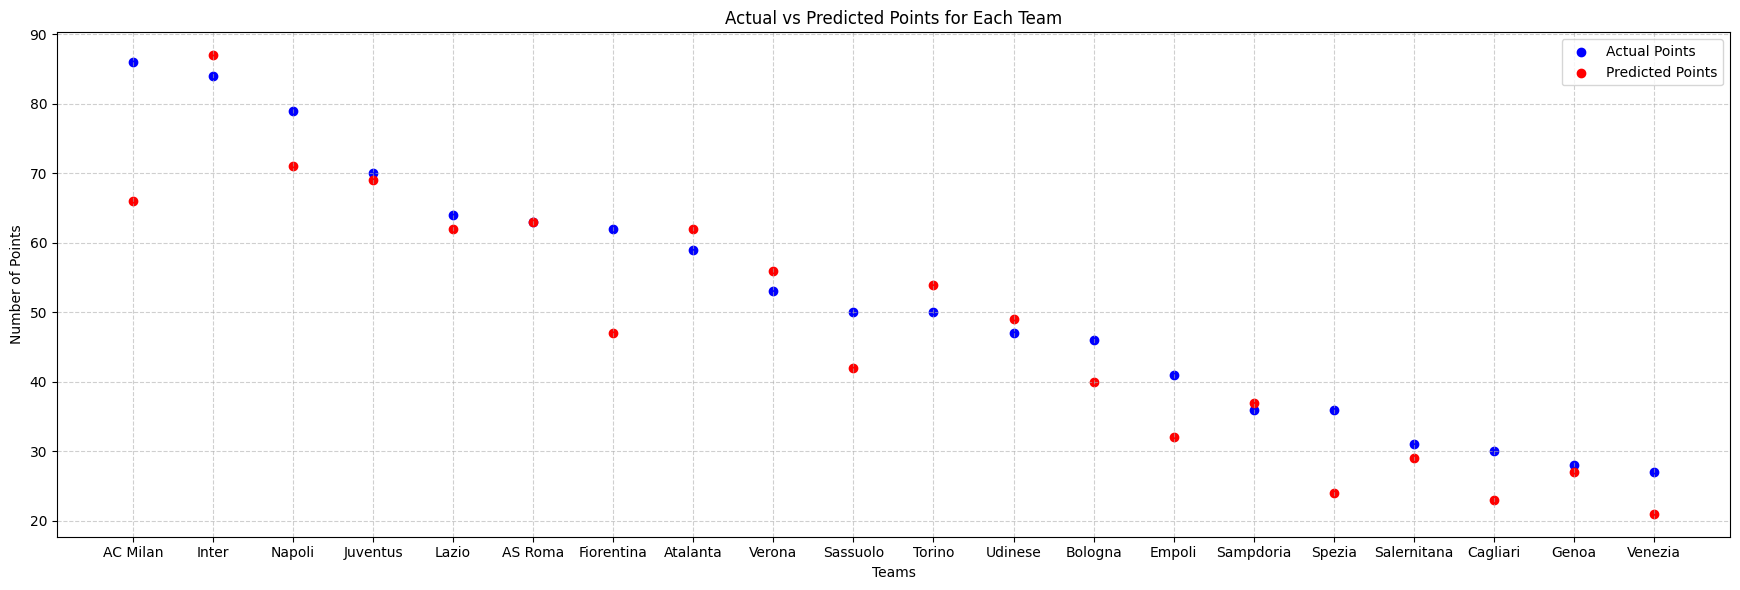

86 66
84 87
79 71
70 69
64 62
63 63
62 47
59 62
53 56
50 42
50 54
47 49
46 40
41 32
36 37
36 24
31 29
30 23
28 27
27 21
5.65


In [96]:
# rappresentazione grafica #
from math import*
# Extract teams and points

actual_points = [standings_real[key][0] for key in standings_real]
predicted_points = [standings_pred[key][0] for key in standings_real]

x = range(len(list_teams))

# Plotting the data
fig, ax = plt.subplots(figsize=(17.5, 6))

# Scatter plot for actual points
ax.scatter(x, actual_points, color='blue', label='Actual Points', linestyle='-')

# Scatter plot for predicted points
ax.scatter(x, predicted_points, color = 'red', label='Predicted Points')

# Setting labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Number of Points')
ax.set_title('Actual vs Predicted Points for Each Team')
ax.set_xticks(x)
ax.set_xticklabels(list(standings_real.keys()))
ax.legend()

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

def custom_error(real, pred, k):
    #k = 0 per MSE in punti
    #k = 1 per MSE in goal segnati
    #k = 2 per MSE in goal subiti
    MSE = 0
    for key in real:
        print(real[key][k], pred[key][k] )
        MSE += abs(real[key][k] - pred[key][k])
    
    return MSE/len(real.keys())

MSE_punti = custom_error(standings_real, standings_pred, 0)
print(MSE_punti)


In [93]:
from sklearn.metrics import mean_squared_error

# Create a pipeline with scaling and Poisson regression with Ridge regularization
model_regularized_Pois = make_pipeline(StandardScaler(), PoissonRegressor(alpha=0.002))  

# Fit the model
model_regularized_Pois.fit(X_H_train, Y_H_train)

# Predict and evaluate
y_pred_H = model_regularized_Pois.predict(X_H_test)
print(f'Mean Squared Error: {mean_squared_error(Y_H_test, y_pred_H)}')
y_pred_rounded_H = np.round(y_pred_H).astype(int)
risultati['H_Score_predicted'] = y_pred_rounded_H


###TRASFERTA

model_regularized_Pois.fit(X_A_train, Y_A_train)

# Predict and evaluate
y_pred_A = model_regularized_Pois.predict(X_A_test)
print(f'Mean Squared Error: {mean_squared_error(Y_A_test, y_pred_A)}')
y_pred_rounded_A = np.round(y_pred_A).astype(int)
risultati['A_Score_predicted'] = y_pred_rounded_A

display(risultati)

#calcolo 
standings_pred = {team: [0,0,0] for team in list_teams}
standings_real = {team: [0,0,0] for team in list_teams}

for i in range (len(risultati.iloc[:,0])):
  if risultati.iloc[i,2] > risultati.iloc[i,3]:
    standings_real[risultati.iloc[i,0]][0] += 3

  if risultati.iloc[i,2] < risultati.iloc[i,3]:
    standings_real[risultati.iloc[i,1]][0] += 3
    
  if risultati.iloc[i,2] == risultati.iloc[i,3]: 
    standings_real[risultati.iloc[i,0]][0] += 1
    standings_real[risultati.iloc[i,1]][0] += 1
  
  if risultati.iloc[i,4] > risultati.iloc[i,5]:
    standings_pred[risultati.iloc[i,0]][0] += 3

  if risultati.iloc[i,4] < risultati.iloc[i,5]:
    standings_pred[risultati.iloc[i,1]][0] += 3
  
  if risultati.iloc[i,4] == risultati.iloc[i,5]:
    standings_pred[risultati.iloc[i,0]][0] += 1
    standings_pred[risultati.iloc[i,1]][0] += 1

    #reti segnate e subite
  standings_real[risultati.iloc[i,0]][1] += risultati.iloc[i,2]
  standings_real[risultati.iloc[i,0]][2] += risultati.iloc[i,3]
  standings_real[risultati.iloc[i,1]][1] += risultati.iloc[i,3]
  standings_real[risultati.iloc[i,1]][2] += risultati.iloc[i,2] 
  standings_pred[risultati.iloc[i,0]][1] += risultati.iloc[i,4]
  standings_pred[risultati.iloc[i,0]][2] += risultati.iloc[i,5]
  standings_pred[risultati.iloc[i,1]][1] += risultati.iloc[i,5]
  standings_pred[risultati.iloc[i,1]][2] += risultati.iloc[i,4] 
    

standings_real = dict(sorted(standings_real.items(), key=lambda item: item[1], reverse=True))
print(standings_real)

standings_pred = dict(sorted(standings_pred.items(), key=lambda item: item[1], reverse=True))
print(standings_pred)

for key in standings_real:
  print(key,standings_pred[key], '\n')








Mean Squared Error: 0.3775099435303492
Mean Squared Error: 0.3052144115878554


,Home,Away,H_Score,A_Score,H_Score_predicted,A_Score_predicted
3040,Salernitana,Udinese,0,4,1,4
3041,Venezia,Cagliari,0,0,1,0
3042,Inter,Sampdoria,3,0,2,0
3043,Sassuolo,AC Milan,0,3,0,2
3044,Spezia,Napoli,0,3,0,2
...,...,...,...,...,...,...
3415,Udinese,Juventus,2,2,1,2
3416,Empoli,Lazio,1,3,1,2
3417,Torino,Atalanta,1,2,1,1
3418,Inter,Genoa,4,0,4,0


{'AC Milan': [86, 69, 31], 'Inter': [84, 84, 32], 'Napoli': [79, 74, 31], 'Juventus': [70, 57, 37], 'Lazio': [64, 77, 58], 'AS Roma': [63, 59, 43], 'Fiorentina': [62, 59, 51], 'Atalanta': [59, 65, 48], 'Verona': [53, 65, 59], 'Sassuolo': [50, 64, 66], 'Torino': [50, 46, 41], 'Udinese': [47, 61, 58], 'Bologna': [46, 44, 55], 'Empoli': [41, 50, 70], 'Sampdoria': [36, 46, 63], 'Spezia': [36, 41, 71], 'Salernitana': [31, 33, 78], 'Cagliari': [30, 34, 68], 'Genoa': [28, 27, 60], 'Venezia': [27, 34, 69]}
{'AC Milan': [77, 61, 34], 'Inter': [76, 79, 29], 'Napoli': [73, 70, 34], 'Lazio': [70, 70, 50], 'Juventus': [70, 52, 33], 'AS Roma': [60, 58, 41], 'Atalanta': [58, 72, 48], 'Verona': [55, 63, 54], 'Sassuolo': [51, 60, 62], 'Udinese': [50, 66, 65], 'Torino': [49, 49, 43], 'Fiorentina': [44, 56, 55], 'Sampdoria': [38, 47, 59], 'Bologna': [38, 43, 63], 'Empoli': [34, 48, 73], 'Spezia': [33, 36, 69], 'Genoa': [28, 36, 63], 'Salernitana': [28, 35, 76], 'Cagliari': [27, 35, 60], 'Venezia': [26, 3